In [68]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
# Import Data
original_data = pd.read_csv('housing.csv')
data = pd.read_csv('housing.csv')

# Drop Duplicates
data.drop_duplicates()

# A First View of Data
print("\n\tData Info\n")
data.info()
print("\n\n\tData Head\n")
data.head()


	Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


	Data Head



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [70]:
#
# -- Cleaning Data --
#

In [71]:
# 1) So we have 9 numeric columns and 1 categorical column: ocean_proximity,
# with 5 categories (<1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN).

In [72]:
# 4) Search for null values
for col in data.columns:

    # Get indecies of "data DataFrame" rows, if data['col'] has null values
    null_values_index = data[col].index[pd.isnull(data[col])]

    # If null_rows_index isn't empty
    if len(null_values_index) > 0:

        # Get col's median
        median = data[col].median()

        # Replace the NaN values with median value of this column
        for data_values_index in null_values_index:
            data.at[data_values_index, col] = median


In [73]:
# 2) MinMax Scaling to [0, 1]
data_columns_for_scaling = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                            'population', 'households', 'median_income', 'median_house_value']
data[data_columns_for_scaling] = preprocessing.MinMaxScaler().fit_transform(data[data_columns_for_scaling])

In [74]:
# 3) One Hot Vector Encoding
data.groupby('ocean_proximity')['ocean_proximity'].count()

# We save this Series for Visualization
ocean_proximity = data.ocean_proximity

# Create a One Hot Vector Encoding DataFrame
one_hot_vector_encoding = pd.get_dummies(data.ocean_proximity, prefix = 'Ocean_Proximity')

# Join that to the data DataFrame
data = data.join(one_hot_vector_encoding)

# Delete the column: ocean_proximity
data.drop(['ocean_proximity'], axis = 1, inplace = True)

In [75]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_Proximity_<1H OCEAN,Ocean_Proximity_INLAND,Ocean_Proximity_ISLAND,Ocean_Proximity_NEAR BAY,Ocean_Proximity_NEAR OCEAN
0,-122.23,37.88,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0,0,0,1,0
1,-122.22,37.86,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0,0,0,1,0
2,-122.24,37.85,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0,0,0,1,0
3,-122.25,37.85,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0,0,0,1,0
4,-122.25,37.85,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0,0,0,1,0


In [76]:
#
# -- Data Visualization --
#

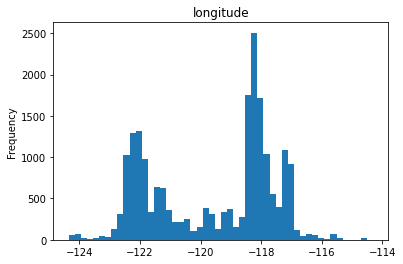

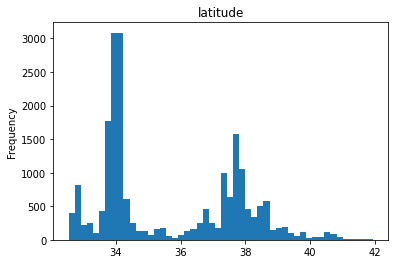

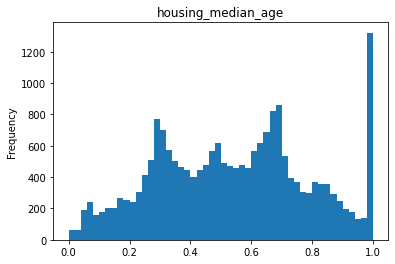

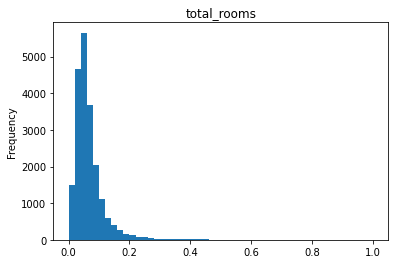

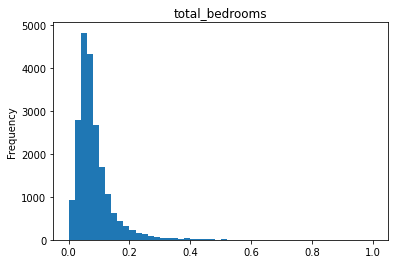

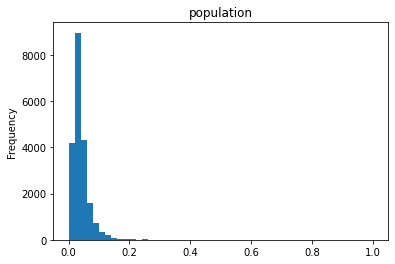

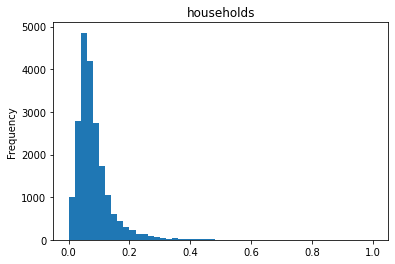

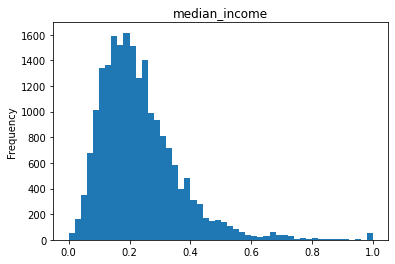

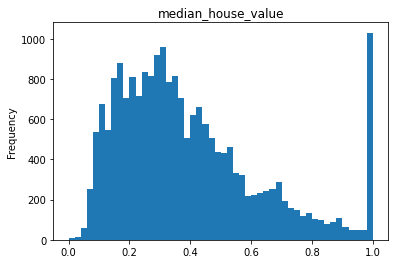

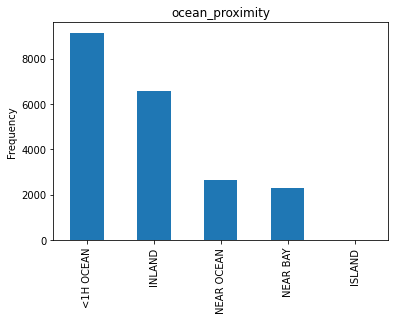

In [77]:
# 1) Frequency Histograms of each column
#
# For all numeric columns
for i in data.columns[:-5]:
    plt.figure()
    plt.hist(data[i], bins=50)
    plt.gca().set(title=i, ylabel='Frequency')

# For Categorical feature: ocean_proximity
plt.figure()
plt.title('ocean_proximity')
plt.ylabel('Frequency')
ocean_proximity.value_counts().plot(kind='bar')
plt.show()

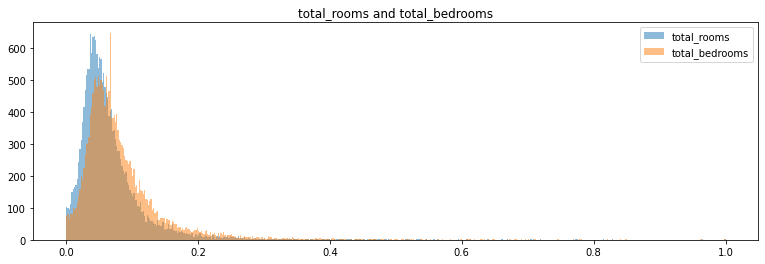

In [78]:
# 2) Histogram Overlapping

# First between total_rooms and total_bedrooms columns
plt.figure(figsize=(13, 4))
plt.title('total_rooms and total_bedrooms')
plt.hist(data.total_rooms, bins = 500, alpha = 0.5, label = 'total_rooms')
plt.hist(data.total_bedrooms, bins = 500, alpha = 0.5, label = 'total_bedrooms')
plt.legend(loc='upper right')
plt.show()

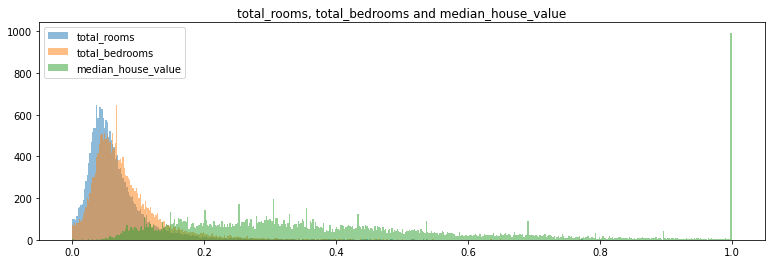

In [79]:
# Second between total_rooms, total_bedrooms and median_house_value
plt.figure(figsize=(13, 4))
plt.title('total_rooms, total_bedrooms and median_house_value')
plt.hist(data.total_rooms, bins = 500, alpha = 0.5, label = 'total_rooms')
plt.hist(data.total_bedrooms, bins = 500, alpha = 0.5, label = 'total_bedrooms')
plt.hist(data.median_house_value, bins = 500, alpha = 0.5, label = 'median_house_value')
plt.legend(loc='upper left')
plt.show()

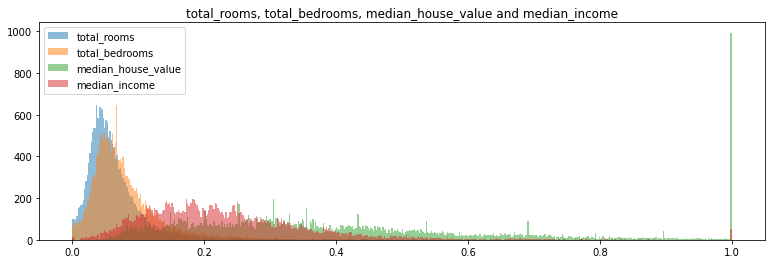

In [80]:
# And Last between total_rooms, total_bedrooms, median_house_value and median_income
plt.figure(figsize=(13, 4))
plt.title('total_rooms, total_bedrooms, median_house_value and median_income')
plt.hist(data.total_rooms, bins = 500, alpha = 0.5, label = 'total_rooms')
plt.hist(data.total_bedrooms, bins = 500, alpha = 0.5, label = 'total_bedrooms')
plt.hist(data.median_house_value, bins = 500, alpha = 0.5, label = 'median_house_value')
plt.hist(data.median_income, bins = 500, alpha = 0.5, label = 'median_income')
plt.legend(loc='upper left')
plt.show()

In [81]:
#
# -- Data Regression --
#

In [82]:
# k-Fold Cross-Validation
def my_KFold(vx, k):

    kf = KFold(n_splits = k)
    vtrain_index, vtest_index = next(kf.split(vx))

    return vtrain_index, vtest_index

In [83]:
# Cost of Mean Squared Error (MSE)
def mean_squared_error(y_true, y_predicted):

	# Calculating the loss or cost
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

In [84]:
# Gradient descent with MSE minimization
def gradient_descent(x, y, epochs = 1000, learning_rate = 0.00006,
					stopping_threshold = 1e-6):

	# Initializing weight, bias, learning rate and iterations
	current_weights = np.ones(len(x[0]))
	current_bias = 0.01
	epochs = epochs
	learning_rate = learning_rate
	n = float(len(x))

	costs = []
	previous_cost = None

	# Estimation of optimal parameters
	for i in range(epochs):

		# Making predictions
		y_predicted = np.dot(x, current_weights) + current_bias

		# Calculation the current cost
		current_cost = mean_squared_error(y, y_predicted)

		# If the change in cost is less than or equal to
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break

		previous_cost = current_cost

		costs.append(current_cost)

		# Calculating the gradients
		weight_derivative = -(2/n) * np.dot(x.T,(y-y_predicted))
		bias_derivative = -(2/n) * sum(y-y_predicted)

		# Updating weights and bias
		current_weights = current_weights - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)

		# Printing the parameters for each Epoch
		print('\n----------------------------------------------------------------\n')
		print('Epoch:', i+1, '\n\nMSE Cost:', current_cost, '\nMAE Cost:', mean_absolute_error(y, y_predicted), '\nWeights:\n', current_weights, '\nBias:', current_bias)

	return current_weights, current_bias, costs

In [85]:
# Dataset Preparation
independent_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'Ocean_Proximity_<1H OCEAN', 'Ocean_Proximity_INLAND', 'Ocean_Proximity_ISLAND',
       'Ocean_Proximity_NEAR BAY', 'Ocean_Proximity_NEAR OCEAN']
dependent_column = 'median_house_value'

X = data[independent_columns].to_numpy(dtype=float)
Y = data[dependent_column].to_numpy(dtype=float)

# 10-Fold Cross-Validation
train_index, test_index = my_KFold(X, 10)

# Define the training and testing sets
X_train, X_test = X[train_index], X[test_index]
Y_train, Y_test = Y[train_index], Y[test_index]

In [86]:
#
# 1) LMS Training
#
# Estimating weights and bias using Gradient Descent with MSE minimization
ep = 500
estimated_weights, estimated_bias, costs = gradient_descent(X_train, Y_train, epochs=ep)

print('\n----------------------------------------------------------------\n')
print('Final Estimated Weights: ', estimated_weights, '\n\nFinal Estimated Bias: ', estimated_bias)


----------------------------------------------------------------

Epoch: 1 

MSE Cost: 6773.161026707132 
MAE Cost: 82.29455364968523 
Weights:
 [-0.17827258  1.34917855  1.00529871  1.00066246  1.00082664  1.00039892
  1.00081518  1.00230198  1.00481644  1.00310121  1.0000027   1.00053714
  1.00141786] 
Bias: 0.019875346437962238

----------------------------------------------------------------

Epoch: 2 

MSE Cost: 5002.0922248690185 
MAE Cost: 70.65578160611246 
Weights:
 [0.83403302 1.0485425  1.00074646 1.00009303 1.00011676 1.00005675
 1.00011538 1.00033319 1.00077154 1.00034256 1.00000052 1.00005457
 1.00022746] 
Bias: 0.011396652645228773

----------------------------------------------------------------

Epoch: 3 

MSE Cost: 3694.364849691922 
MAE Cost: 60.77321327020683 
Weights:
 [-0.0360078   1.30628716  1.00465906  1.00058215  1.00072719  1.00035139
  1.00071739  1.00203424  1.00434109  1.00261927  1.00000253  1.00044823
  1.00127832] 
Bias: 0.018689438237653587

---------


 LMS Testing MSE (with 500 training Epochs): 4.420479071378372

 LMS Testing MAE (with 500 training Epochs): 1.9724113151838392


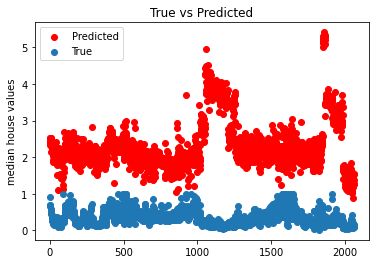

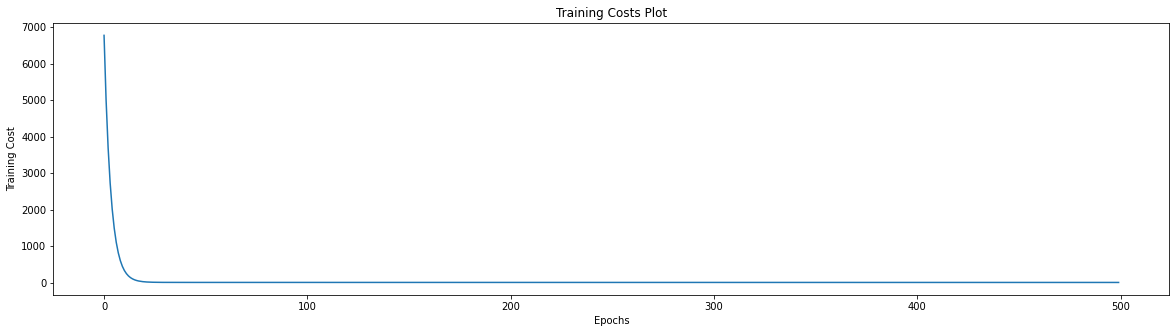

In [87]:
#
# LMS Testing
#
Y_pred = X_test.dot(estimated_weights.T) + estimated_bias

#
print('\n', 'LMS Testing MSE (with', ep, 'training Epochs):', mean_squared_error(Y_test, Y_pred))
print('\n', 'LMS Testing MAE (with', ep, 'training Epochs):', mean_absolute_error(Y_test, Y_pred))

# True vs Predicted Plot
plt.figure()
plt.scatter(list(range(len(Y_pred))), pd.DataFrame(Y_pred), label='Predicted', color='red')
plt.scatter(list(range(len(Y_pred))), pd.DataFrame(Y_test), label='True')
plt.ylabel('median house values')
plt.title('True vs Predicted')
plt.legend(loc='best')
plt.show()

# Cost plot
costs = pd.DataFrame(costs)
plt.figure(figsize=(20, 5))
plt.plot(costs)
plt.autoscale()
plt.title('Training Costs Plot')
plt.ylabel('Training Cost')
plt.xlabel('Epochs')
plt.show()

LMS_predicted = Y_pred.copy()

In [88]:
#
# 2) LS Building the model
#
m = []
X_mean = []
Y_mean = np.mean(Y_train)

for i in range(len(X_train[0])):
	X_mean.append(np.mean(X_train[i]))
	num = 0
	den = 0
	for j in range(len(X_train)):
		num += (X_train[j, i] - X_mean[i])*(Y_train[j] - Y_mean)
		den += (X_train[j, i] - X_mean[i])**2
	m.append(num / den)

c = Y_mean - np.dot(np.array(m), np.array(X_mean))


 LS Testing MSE: 0.042155660171509485

 LS Testing MAE: 0.16764192465561106


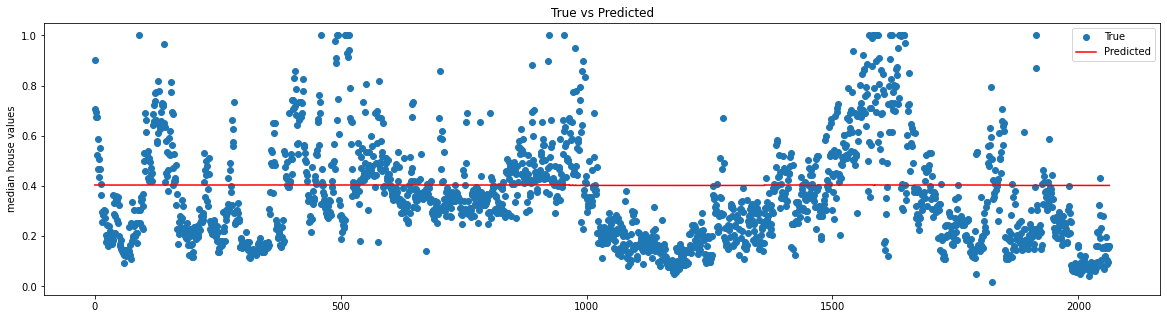

In [89]:
#
# LS Testing
#
LS_predicted = np.dot(np.array(m), X_test.T) + c

print('\n', 'LS Testing MSE:', mean_squared_error(Y_test, LS_predicted))
print('\n', 'LS Testing MAE:', mean_absolute_error(Y_test, LS_predicted))

# True vs Predicted Plot
plt.figure(figsize=(20, 5))
plt.scatter(list(range(len(LS_predicted))), pd.DataFrame(Y_test), label='True')
plt.plot(pd.DataFrame(LS_predicted), label='Predicted', color='red')
plt.ylabel('median house values')
plt.title('True vs Predicted')
plt.legend(loc='best')
plt.show()

In [90]:
#
# Non-Linear Regression with Neural Networks
#

# Preparation

# Split to train, validation, test sets
X_train_validation = X_train.copy()
Y_train_validation = Y_train.copy()

train_index, validation_index = my_KFold(X_train_validation, 10)

X_train = X_train_validation[train_index]
Y_train = Y_train_validation[train_index]

X_validation = X_train_validation[validation_index]
Y_validation = Y_train_validation[validation_index]

In [95]:
# Create the Model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=13))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically, ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_absolute_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), epochs=50, batch_size=100, verbose=2, callbacks=[es])

Train on 16718 samples, validate on 1858 samples
Epoch 1/50
16718/16718 - 2s - loss: 0.4496 - val_loss: 0.3329
Epoch 2/50
16718/16718 - 1s - loss: 0.2341 - val_loss: 0.2554
Epoch 3/50
16718/16718 - 1s - loss: 0.1859 - val_loss: 0.2956
Epoch 4/50
16718/16718 - 1s - loss: 0.1704 - val_loss: 0.3790
Epoch 5/50
16718/16718 - 1s - loss: 0.2396 - val_loss: 0.0791
Epoch 6/50
16718/16718 - 1s - loss: 0.1367 - val_loss: 0.3956
Epoch 7/50
16718/16718 - 1s - loss: 0.2046 - val_loss: 0.1287
Epoch 8/50
16718/16718 - 1s - loss: 0.1515 - val_loss: 0.0805
Epoch 9/50
16718/16718 - 1s - loss: 0.2687 - val_loss: 0.1064
Epoch 10/50
16718/16718 - 1s - loss: 0.1825 - val_loss: 0.0820
Epoch 11/50
16718/16718 - 1s - loss: 0.1460 - val_loss: 0.0784
Epoch 12/50
16718/16718 - 1s - loss: 0.1434 - val_loss: 0.0820
Epoch 13/50
16718/16718 - 1s - loss: 0.1579 - val_loss: 0.1775
Epoch 14/50
16718/16718 - 1s - loss: 0.1347 - val_loss: 0.1410
Epoch 15/50
16718/16718 - 1s - loss: 0.1198 - val_loss: 0.0718
Epoch 16/50
167


 NN Testing MSE: 185.6908787764589

 NN Testing MAE: 0.14050895666509014


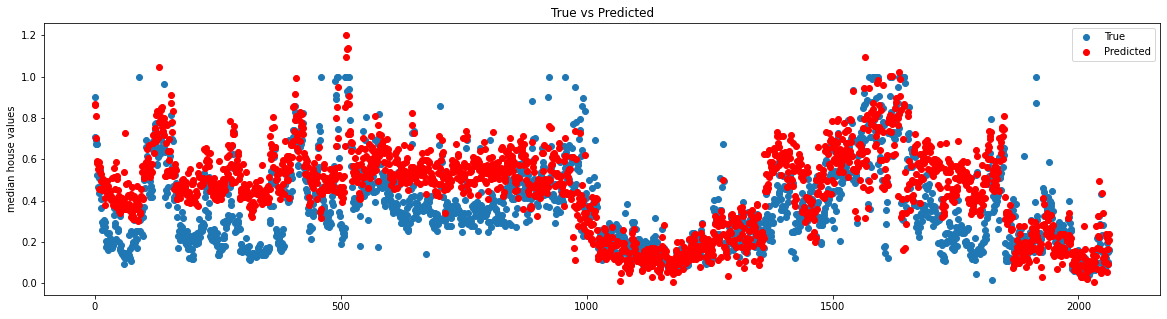

In [96]:
#
# NN Testing
#

# Calculate predictions
NN_predicted = model.predict(X_test)

print('\n', 'NN Testing MSE:', mean_squared_error(Y_test, NN_predicted))
print('\n', 'NN Testing MAE:', mean_absolute_error(Y_test, NN_predicted))

# True vs Predicted Plot
plt.figure(figsize=(20, 5))
plt.scatter(list(range(len(NN_predicted))), pd.DataFrame(Y_test), label='True')
plt.scatter(list(range(len(NN_predicted))), pd.DataFrame(NN_predicted), label='Predicted', color='red')
plt.ylabel('median house values')
plt.title('True vs Predicted')
plt.legend(loc='best')
plt.show()